<a href="https://colab.research.google.com/github/GeneGenius/Understanding-NLP/blob/main/Task_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=99c3bb211d6ffdbd53b2ecb5c0257dc29630bd6239ab9bdf7070a9dd6263bd9f
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
#Importing the  data
import collections
import wget
text_file = wget.download(url="https://akela.mendelu.cz/~xvalovic/data.txt")


In [ ]:
#Tokenizing the data
import nltk
import re
nltk.download("punkt")
from nltk.tokenize import word_tokenize 

words = [] 
for document in documents:
    document_tokens = [word.lower() for word in word_tokenize(document) if not re.match('\W', word)]
    words.extend(document_tokens)
    
words
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Sorting in descending order

from collections import Counter

dictionary = Counter(words)

dictionary.most_common()



[('the', 168463),
 ('and', 88924),
 ('was', 68615),
 ('to', 60896),
 ('a', 57528),
 ('in', 41533),
 ('very', 40585),
 ('of', 36357),
 ('room', 35715),
 ('hotel', 33108),
 ('for', 30717),
 ('is', 30340),
 ('it', 26953),
 ('not', 25940),
 ('i', 24259),
 ('staff', 23992),
 ('we', 23669),
 ('good', 21528),
 ('were', 21504),
 ('breakfast', 17471),
 ('location', 17425),
 ('with', 17030),
 ('but', 16470),
 ('on', 15012),
 ('at', 14855),
 ('from', 12483),
 ('there', 12374),
 ('had', 12276),
 ('no', 12236),
 ('that', 12219),
 ('clean', 11505),
 ('rooms', 11188),
 ('have', 11153),
 ('you', 10911),
 ('friendly', 10679),
 ('nice', 10343),
 ('this', 10295),
 ('as', 10227),
 ('be', 9895),
 ('helpful', 9172),
 ('our', 9150),
 ('are', 9036),
 ('would', 8362),
 ('great', 8319),
 ('excellent', 8262),
 ('all', 7782),
 ('so', 7490),
 ('they', 7458),
 ('did', 7433),
 ('small', 7419),
 ("n't", 7378),
 ('comfortable', 7050),
 ('stay', 6962),
 ('only', 6942),
 ('could', 6882),
 ('my', 6811),
 ('one', 6213),
 

In [ ]:
#Zipf's Law
import math 

x_axis = [math.log(i) for i in range(1, len(dictionary) + 1)]
y_axis = [math.log(item[1]) for item in dictionary.most_common()]

x_axis[-1]
#y_axis

10.852109937773546

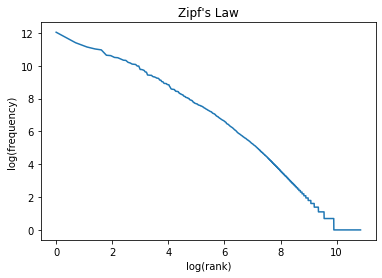

In [ ]:
#Plotting Zipf's Law
import matplotlib.pyplot as plt


plt.title("Zipf's Law")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.plot(x_axis, y_axis)

plt.show()


In [ ]:
#Most and Least Frequent Words
most_frq = dictionary.most_common()[:10]
least_frq = dictionary.most_common()[-10:]

print("Most frequent words", most_frq)

print("Least frequent words", least_frq)

Most frequent words [('the', 168463), ('and', 88924), ('was', 68615), ('to', 60896), ('a', 57528), ('in', 41533), ('very', 40585), ('of', 36357), ('room', 35715), ('hotel', 33108)]
Least frequent words [('pleasand', 1), ('sparsley', 1), ('staff/manageress', 1), ('würzburg', 1), ('drastically', 1), ('personel..', 1), ('lasne', 1), ('countrysite', 1), ('alexsotas', 1), ('2room', 1)]


The most frequent is the *definite article* "the" which is not unusual as it is frequently used as well as the *conjunction* "and". However, the words least used are mostly words wrongly spelt which makes sense. 

Bigrams without Stopwords Below:

In [ ]:
#Bigrams Without Stopwords
from nltk import ngrams, bigrams

bigrams_list=[]
for document in documents:
    document_tokens = [word.lower() for word in word_tokenize(document) if not re.match("\W", word)]
    bigrams_list.extend(['_'.join(item) for item in bigrams(document_tokens)])

bigrams_list

['very_good',
 'good_price/quality',
 'price/quality_good',
 'good_breakfast',
 'breakfast_and',
 'and_free',
 'free_internet',
 'internet_on',
 'on_the',
 'the_lobby',
 'breakfast_room',
 'room_is',
 'is_a',
 'a_bit',
 'bit_small',
 'small_for',
 'for_the',
 'the_size',
 'size_of',
 'of_hotel',
 'hotel_so',
 'so_be',
 'be_prepared',
 'prepared_to',
 'to_share',
 'share_a',
 'a_table',
 'table_or',
 'or_wait',
 'wait_a',
 'a_while',
 'while_there',
 'there_no',
 'no_swimming',
 'swimming_pool',
 'pool_or',
 'or_recreation',
 'recreation_facilities',
 'facilities_at',
 'at_time',
 'time_of',
 'of_writing',
 'writing_the',
 'the_business',
 'business_center',
 'center_was',
 'was_unfinished',
 'the_hotel',
 'hotel_was',
 'was_very',
 'very_close',
 'close_to',
 'to_public',
 'public_transport',
 'transport_enroute',
 'enroute_from',
 'from_the',
 'the_airport',
 'airport_to',
 'to_city',
 'city_reception',
 'reception_staff',
 'staff_were',
 'were_willing',
 'willing_and',
 'and_capable'

Bigrams With Stopwords

In [ ]:
#Bigrams with Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

bigrams_list=[]

for document in documents[:10]:
  filtered_bigrams = []
  document_tokens = [word.lower() for word in word_tokenize(document) if not re.match("\W", word)]
  for word in document_tokens:
    if word.lower() not in stopwords.words("english"):
      filtered_bigrams.append(word)
  bigrams_list.extend(['_'.join(item) for item in bigrams(filtered_bigrams)])        

bigrams_list


    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['good_price/quality',
 'price/quality_good',
 'good_breakfast',
 'breakfast_free',
 'free_internet',
 'internet_lobby',
 'breakfast_room',
 'room_bit',
 'bit_small',
 'small_size',
 'size_hotel',
 'hotel_prepared',
 'prepared_share',
 'share_table',
 'table_wait',
 'wait_swimming',
 'swimming_pool',
 'pool_recreation',
 'recreation_facilities',
 'facilities_time',
 'time_writing',
 'writing_business',
 'business_center',
 'center_unfinished',
 'hotel_close',
 'close_public',
 'public_transport',
 'transport_enroute',
 'enroute_airport',
 'airport_city',
 'city_reception',
 'reception_staff',
 'staff_willing',
 'willing_capable',
 'capable_really',
 'really_enjoyed',
 'enjoyed_breakfast',
 'breakfast_highly',
 'highly_recommended',
 'watercooker_coffee',
 'coffee_machine',
 'machine_room',
 'good_value',
 'value_hotel',
 'hotel_central',
 'central_location',
 'location_view',
 'view_window',
 'window_lovely-',
 'lovely-_looking',
 'looking_straight',
 'straight_canal',
 'canal_du',
 'd

From the *Bigrams without Stopwords and Bigrams with stopwords*, you can realized the data is more meaningful to analyze, in the later *(Bigrams with stopwords)*. NB: The StopWords are words that gives meaning to our everyday sentences in our communications but do not provide any help in natural language processing (NLP)

In [ ]:
#TRIGRAMS WITHOUT STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, trigrams
from collections import Counter

trigrams_list=[]



for document in documents:
  document_tokens = [word.lower() for word in word_tokenize(document) if not re.match("\W", word)]
  n_grams =nltk.trigrams(document_tokens)
  try:
    trigrams_list.extend(["-".join(item) for item in n_grams])
  except RuntimeError as e:
    pass
    
    
Trigrams_cnt = Counter(trigrams_list)
Trigrams_cnt.most_common()
#def get_ngrams(document_tokens, n):
 #   n_grams=ngrams(word_tokenize(document_tokens), n)
  #  return [''.join(grams) for grams in n_grams]

#get_ngrams(document, 3)

[('the-room-was', 4510),
 ('in-the-room', 3140),
 ('the-hotel-is', 3032),
 ('the-staff-were', 2647),
 ('the-hotel-was', 2592),
 ('of-the-hotel', 2546),
 ('value-for-money', 2118),
 ('close-to-the', 1972),
 ('friendly-and-helpful', 1819),
 ('staff-were-very', 1752),
 ('the-breakfast-was', 1572),
 ('very-friendly-and', 1569),
 ('room-was-very', 1358),
 ('the-location-was', 1342),
 ('the-staff-was', 1266),
 ('there-was-no', 1238),
 ('it-was-a', 1235),
 ('the-location-is', 1175),
 ('good-value-for', 1092),
 ('there-was-a', 1087),
 ('was-a-bit', 1036),
 ('the-rooms-were', 1028),
 ('in-the-hotel', 993),
 ('we-had-to', 975),
 ('was-very-good', 974),
 ('very-close-to', 961),
 ('very-clean-and', 956),
 ('of-the-room', 931),
 ('it-was-very', 903),
 ('and-the-staff', 887),
 ('very-helpful-and', 884),
 ('staff-was-very', 876),
 ('at-the-hotel', 860),
 ('to-the-hotel', 859),
 ('our-room-was', 859),
 ('the-rooms-are', 855),
 ('and-it-was', 834),
 ('we-had-a', 825),
 ('a-lot-of', 825),
 ('in-the-morn

In [ ]:
#TRIGRAMS WITH STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, trigrams
from collections import Counter

trigrams_list=[]



for document in documents:
  filtered_trigrams = []
  document_tokens = [word.lower() for word in word_tokenize(document) if not re.match("\W", word)]
  #n_grams =nltk.trigrams(document_tokens)
  for word in document_tokens:
    if word.lower() not in stopwords.words("english"):
      filtered_trigrams.append(word)
  try:
    trigrams_list.extend(["-".join(item) for item in trigrams(filtered_trigrams)])
  except RuntimeError as e:
    pass
    
    
ngrams_cnt = Counter(trigrams_list)
ngrams_cnt.most_common()
#def get_ngrams(document_tokens, n):
 #   n_grams=ngrams(word_tokenize(document_tokens), n)
  #  return [''.join(grams) for grams in n_grams]

#get_ngrams(document, 3)

Comparing the two data given by *Trigrams without Stopwords* and *Trigrams with Stopwords*, trigrams with stopwords give more meaning to the data than Trigrams without stopwords, Bigrams without words and Bigrams with words. 

In [ ]:
#4-GRAMS WITHOUT STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, trigrams
from collections import Counter

trigrams_list=[]

n=4
for document in documents:
  document_tokens = [word.lower() for word in word_tokenize(document) if not re.match("\W", word)]
  n_grams =ngrams(document_tokens, n)
  try:
    trigrams_list.extend(["-".join(item) for item in n_grams])
  except RuntimeError as e:
    pass
    
    
ngrams_cnt = Counter(trigrams_list)
ngrams_cnt.most_common()


In [ ]:
#4-GRAMS WITH STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, trigrams
from collections import Counter

ngrams_list=[]

n=4

for document in documents:
  filtered_ngrams = []
  document_tokens = [word.lower() for word in word_tokenize(document) if not re.match("\W", word)]
  #n_grams =nltk.trigrams(document_tokens)
  for word in document_tokens:
    if word.lower() not in stopwords.words("english"):
      filtered_ngrams.append(word)
  try:
    ngrams_list.extend(["-".join(item) for item in ngrams(filtered_ngrams, n)])
  except RuntimeError as e:
    pass
    
    
ngrams_cnt = Counter(ngrams_list)
ngrams_cnt.most_common()


[('within-easy-walking-distance', 95),
 ('hotel-staff-friendly-helpful', 91),
 ('tea-coffee-making-facilities', 77),
 ('staff-friendly-helpful-room', 75),
 ('hotel-good-value-money', 74),
 ('friendly-staff-good-location', 68),
 ('friendly-staff-good-breakfast', 61),
 ('staff-extremely-friendly-helpful', 58),
 ('staff-friendly-helpful-breakfast', 56),
 ('good-location-friendly-staff', 55),
 ('location-within-walking-distance', 55),
 ('staff-friendly-helpful-location', 52),
 ('location-good-value-money', 45),
 ('staff-friendly-helpful-hotel', 45),
 ('location-friendly-helpful-staff', 44),
 ('friendly-helpful-staff-good', 41),
 ('coffee-making-facilities-room', 41),
 ('staff-good-value-money', 41),
 ('clean-staff-friendly-helpful', 40),
 ('friendly-helpful-staff-clean', 40),
 ('made-us-feel-welcome', 40),
 ('staff-extremely-helpful-friendly', 39),
 ('great-location-friendly-staff', 39),
 ('staff-friendly-helpful-rooms', 38),
 ('friendly-helpful-room-clean', 38),
 ('helpful-staff-good-loca

The 4-grams with stopwords gives clearer meaning than the bigrams and bigrams but it can be inferred that the more higher the n, for the ngrams the lesser the word count. 



In [ ]:
#Stemming the Data
from nltk.stem import PorterStemmer

stemmed_words_list=[]
pst=PorterStemmer()
for document in documents:
  stemmed_word=[]
  document_tokens = [word.lower() for word in word_tokenize(document) if not re.match("\W", word)]
  for word in document_tokens:
    stemmed_word.append(pst.stem(word))
  stemmed_words_list.append(word +":" +pst.stem(word))
    

stemmed_words_list

['lobby:lobbi',
 'unfinished:unfinish',
 'recommended:recommend',
 'room:room',
 'berry:berri',
 'ok:ok',
 'food:food',
 'room:room',
 'children:children',
 'friendly:friendli',
 'cooperation:cooper',
 'cabin:cabin',
 '215:215',
 'it:it',
 'overpriced:overpr',
 'time:time',
 'noise:nois',
 'charge:charg',
 'house:hous',
 'experience:experi',
 'nights:night',
 'hot:hot',
 'good:good',
 'occupants:occup',
 'low-season:low-season',
 'open:open',
 'hotel:hotel',
 'disappointing:disappoint',
 'money:money',
 'old:old',
 'all:all',
 'unit:unit',
 'room:room',
 'desk:desk',
 'experience:experi',
 'mediocre:mediocr',
 'room:room',
 'drinks:drink',
 'return:return',
 'road:road',
 'tidy:tidi',
 'sea:sea',
 'decor:decor',
 'views:view',
 'rooms:room',
 'shower:shower',
 'familia:familia',
 'ripped:rip',
 'knowledgeable:knowledg',
 'streetside:streetsid',
 'hotel:hotel',
 'holiday:holiday',
 'stay:stay',
 'overhaul:overhaul',
 'location:locat',
 'cheating:cheat',
 'room:room',
 'excellent:excel',

The stemming algorithms is used to normalize the words into its root form